In [1]:
from ultralytics import YOLO
import cv2
import supervision as sv

In [4]:
!nvidia-smi

Fri Apr 18 20:35:18 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.124.06             Driver Version: 570.124.06     CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070        Off |   00000000:01:00.0  On |                  N/A |
|  0%   38C    P8             18W /  200W |     886MiB /  12282MiB |      3%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
%pip install ultralytics

## Run inference

In [2]:
image_path = f"/home/lastinm/PROJECTS/FINAL/test_img/card26_jpg.rf.9defe96ac5b853d3f84650575dc86d39.jpg"

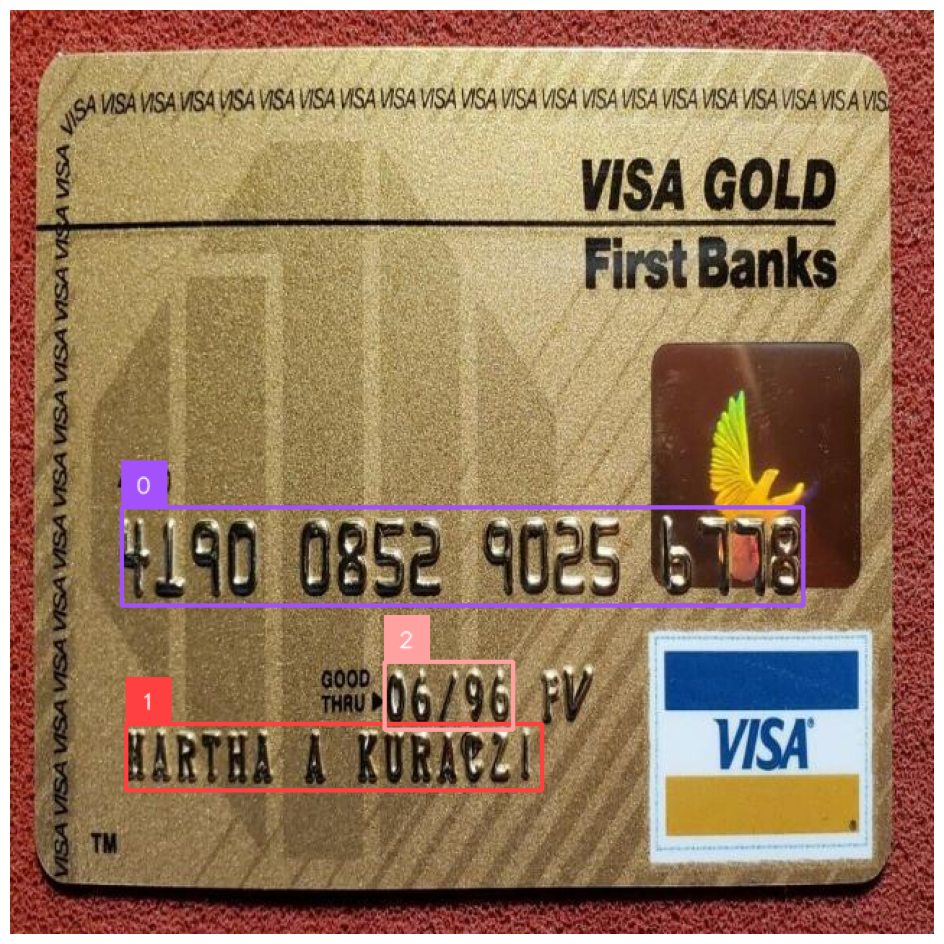

In [3]:
model = YOLO(f'/home/lastinm/PROJECTS/FINAL/notebooks/runs/detect/train5/weights/best.pt')
image = cv2.imread(image_path)

results = model(image, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results).with_nms()

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = image.copy()
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)